<a href="https://colab.research.google.com/github/NbtKmy/gc_workshops/blob/main/Netzwerk_Darstellung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netzwerk-Visualisierung

## Einführung

Netzwerk-Visualisierung wird verwendet, um die Beziehungen zwischen Objekten darzustellen. Ein Netzwerk (auch "Graph" bezeichnet) besteht dabei aus Nodes (Knoten) und Edges (Kanten).

### Tools

Es sind viele Tools für die Visualisierung vorhanden.
Hier sind nur ein Paar Auswahl genannt:


- [**Gephi**](https://gephi.org/): Open Source Software für Netzwerk-Visualisierung und Analyse.
- [**Gephi Lite**](https://gephi.org/gephi-lite/): Browser-Version von Gephi. Guter Einstieg für Netzwerk-Visualisierung.
- [**igraph**](https://igraph.org/): Open Source Software für Netzwerk-Analyse

Für Python sind ebenso unterschiedliche Libraries für Netzwerk-Visalisierung bzw. Analyse angeboten. Wir benutzen hier die Library [NetworkX](https://networkx.org/).

### Datenformat

Es gibt viele Datenformate für Netzwerk-Darstellung. Die folgenden 3 Formate sind in vielen Softwares unterstützt:

- GML
- GraphML
- XGMML

## Einsatzbereich der Graph

Die Netzwerk-Analyse wird für unterschiedliche Bereiche verwendet. Unten sind die naheligenden Einsatzszenarien:

- Analyieren der Beziehungen von Usern/Posts in einem Social Meiden, wie Facebook oder X (ehem. Twitter)
- Analysieren der Beziehungen von einzelnen Wörter in einem Text/Text-Korpus
- Analyse der Hyperlink-Verbindungen der diversen Websiten
- Analyse der Zitate/Referenz von mehreren Artikel/Werke
- Analyse der Sozialnetzwerk in einer Gesellschaft oder in einer Organisation

Durch Netzwerk-Analyse kann man zum Beispiel Folgendes herausfinden:
- Wer/Was steht im Zentrum in dem Netzwerk
- Welche Gruppe existieren in einem Netzwerk
- Wo gibt es Flaschenhals des Netzwerkes?



In der zweiten Sitzung probieren wir Textanalyse und Analyse der Zitat aus.





## Einfaches Netzwerk zeichnen

Zum Einstieg zeichnen wir zuerst ein ziemlich einfaches Netzwerk!

In [ ]:
# Die Library "NetworkX" ist bereits installiert:
!pip list | grep "networkx"

networkx                         3.1


In [ ]:
# falls eine alte Version installiert ist, kann man mit der Option "-U" die neueste Version installieren. Die Option "-q" bedeutet, dass der Befehl weniger output gibt
!pip install -qU networkx matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.6 MB/s eta 0:00:00


## Einfache Graph

Eine Graph zu zeichen, ist eigentlich einfach!
Man braucht nur Nodes (Knoten) und Edges (Kanten) einzugeben.

__Nodes__

Nodes soll hier im Beispiel in Form der "[Liste](https://www.w3schools.com/python/python_lists.asp)" eingegeben werden:
```python
liste = ["A", "B", "C"]
```

Wie man ein Listenobjekt behandeln kann, findt man [hier](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists).

__Edges__

Eine Edge verbindet i.d.R. zwei Nodes, z.B. Node-A und Node-B. Die Verbindung wird zuerst in [Tuple](https://www.w3schools.com/python/python_tuples.asp) dargestellt. Weil eine Graph mehrere Edges beinhaltet, werden mehrere Edges in einer Liste umgefasst wie unten:
```python
one_edge = ("A", "B")
edges = [("A", "B"), ("B", "C"), ("A", "C")]
```

...Dann sind wir schon bereit, die erste Graph zu zeichnen!


In [ ]:
import networkx as nx
graph = nx.Graph()

# Nodes werden als ein Listenobjekt hinzugefügt
graph.add_nodes_from(["A", "B", "C"])
# Edges werden ebenso ein Listenobjekt hinzugefügt.
# Datei sind die Beziehungen zwischen zwei Nodes als Tuple erfasst
graph.add_edges_from([("A", "B"), ("B", "C"), ("A", "C")])
nx.draw(graph, node_size=400, node_color="red", with_labels=True, font_weight="bold")

## Degree (Vernetzungsgrad)

Vernetzungsgrad einer Node bei einem ungerichteten Graph entspricht die Zahl der Edges an der Node.

Durchschnitt des Vernetungsgrades bei einem ungerichtigegen Graph kann man folgendermassen berechnen:


$$ \frac{\text {Summe der Vernetzungsgrade aller Nodes}}{\text {Zahl der Nodes}} $$



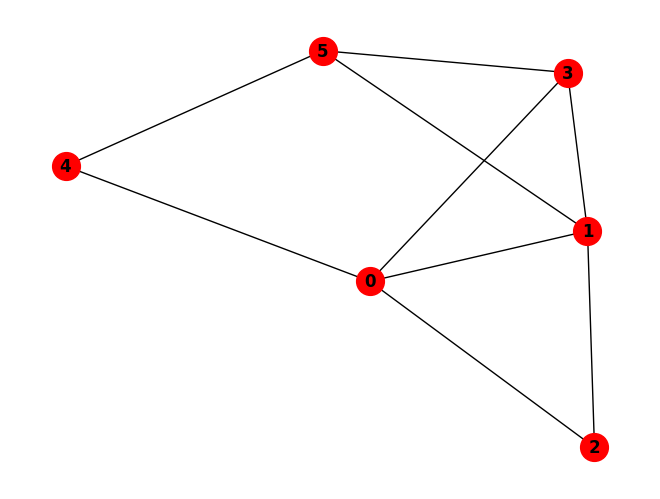

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

graph = nx.Graph()

nodes = [0, 1, 2, 3, 4, 5]
graph.add_nodes_from(nodes)

edges = []
for i in range(10):
    edge = tuple(random.sample(nodes, 2))
    edges.append(edge)
graph.add_edges_from(edges)
nx.draw(graph, node_size=400, node_color="red", with_labels=True, font_weight="bold")




degree: [(0, 4), (1, 4), (2, 2), (3, 3), (4, 2), (5, 3)]
[0, 0, 2, 2, 2]
average degree:  3.0


<BarContainer object of 5 artists>

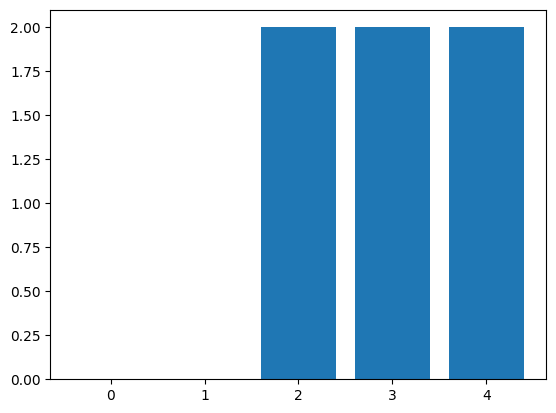

In [ ]:
print("degree:", graph.degree())
print(nx.degree_histogram(graph))

# Average Degree berechnen
num_nodes = len(nodes)
sum_degree = 0
for deg in graph.degree():
    sum_degree += deg[1]
print("average degree: ", sum_degree/num_nodes)

bar_num = len(nx.degree_histogram(graph))
plt.bar(range(bar_num), height = nx.degree_histogram(graph))

## Gerichteter Graph

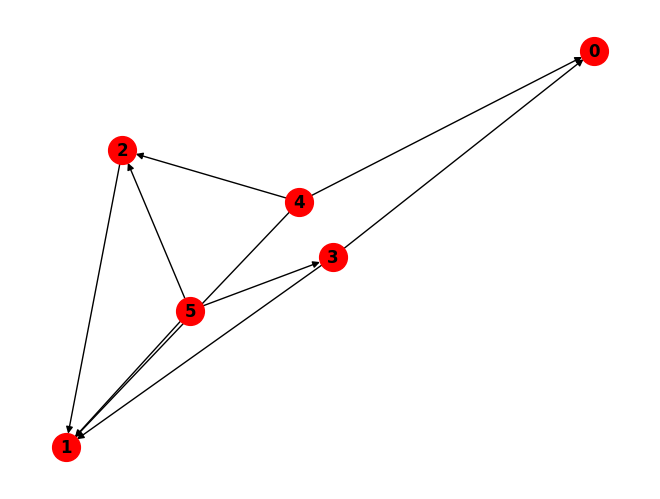

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

graph = nx.DiGraph()

nodes = [0, 1, 2, 3, 4, 5]
graph.add_nodes_from(nodes)

edges = []
for i in range(10):
    edge = tuple(random.sample(nodes, 2))
    edges.append(edge)
graph.add_edges_from(edges)
nx.draw(graph, node_size=400, node_color="red", with_labels=True, font_weight="bold")

In [ ]:
print("in-degree:", graph.in_degree())
# Average In-Degree berechnen
num_nodes = len(nodes)
sum_in_degree = 0
for in_deg in graph.in_degree():
    sum_in_degree += in_deg[1]
print("average in-degree: ", sum_in_degree/num_nodes)

print("out-degree:", graph.out_degree())
# Average Out-Degree berechnen
sum_out_degree = 0
for out_deg in graph.out_degree():
    sum_out_degree += out_deg[1]
print("average out-degree: ", sum_out_degree/num_nodes)


in-degree: [(0, 2), (1, 4), (2, 2), (3, 1), (4, 0), (5, 0)]
average in-degree:  1.5
out-degree: [(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 3)]
average out-degree:  1.5


## Graph mit Multiedge und self-loop



Counter({(5, 2): 2, (5, 3): 1, (3, 1): 1, (1, 0): 1, (2, 3): 1, (5, 0): 1, (0, 4): 1, (2, 2): 1, (2, 5): 1})


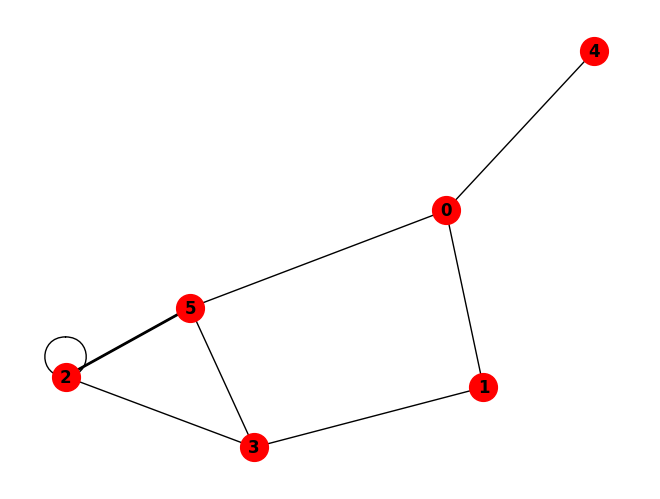

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import collections

graph = nx.MultiGraph()

nodes = [0, 1, 2, 3, 4, 5]
graph.add_nodes_from(nodes)

edges = []
for i in range(10):
    edge = tuple(random.choices(nodes, k=2))
    edges.append(edge)

# Gewicht(Weight) der einzelnen Edges berechnen
count_weight = collections.Counter(edges)
print(count_weight)
for e, w in count_weight.items():
    graph.add_edge(e[0], e[1], weight=w)

weights = nx.get_edge_attributes(graph, "weight").values()
nx.draw(graph, node_size=400, node_color="red", width = list(weights), with_labels=True, font_weight="bold")

## Zentralität (Centrality) des Nodes

Es sind unterschiedliche Methode, um die Zetralität des Nodes zu berechnen.
Unten sind die Auswahl:

- Degree centrality
- Eigenvector centrality
- Katz centrality
- PageRank
- Betweenness centrality

Man kann die Grösse der Nodes nach Zentralität anpassen.
Im Folgenden ein Paar Beispiele

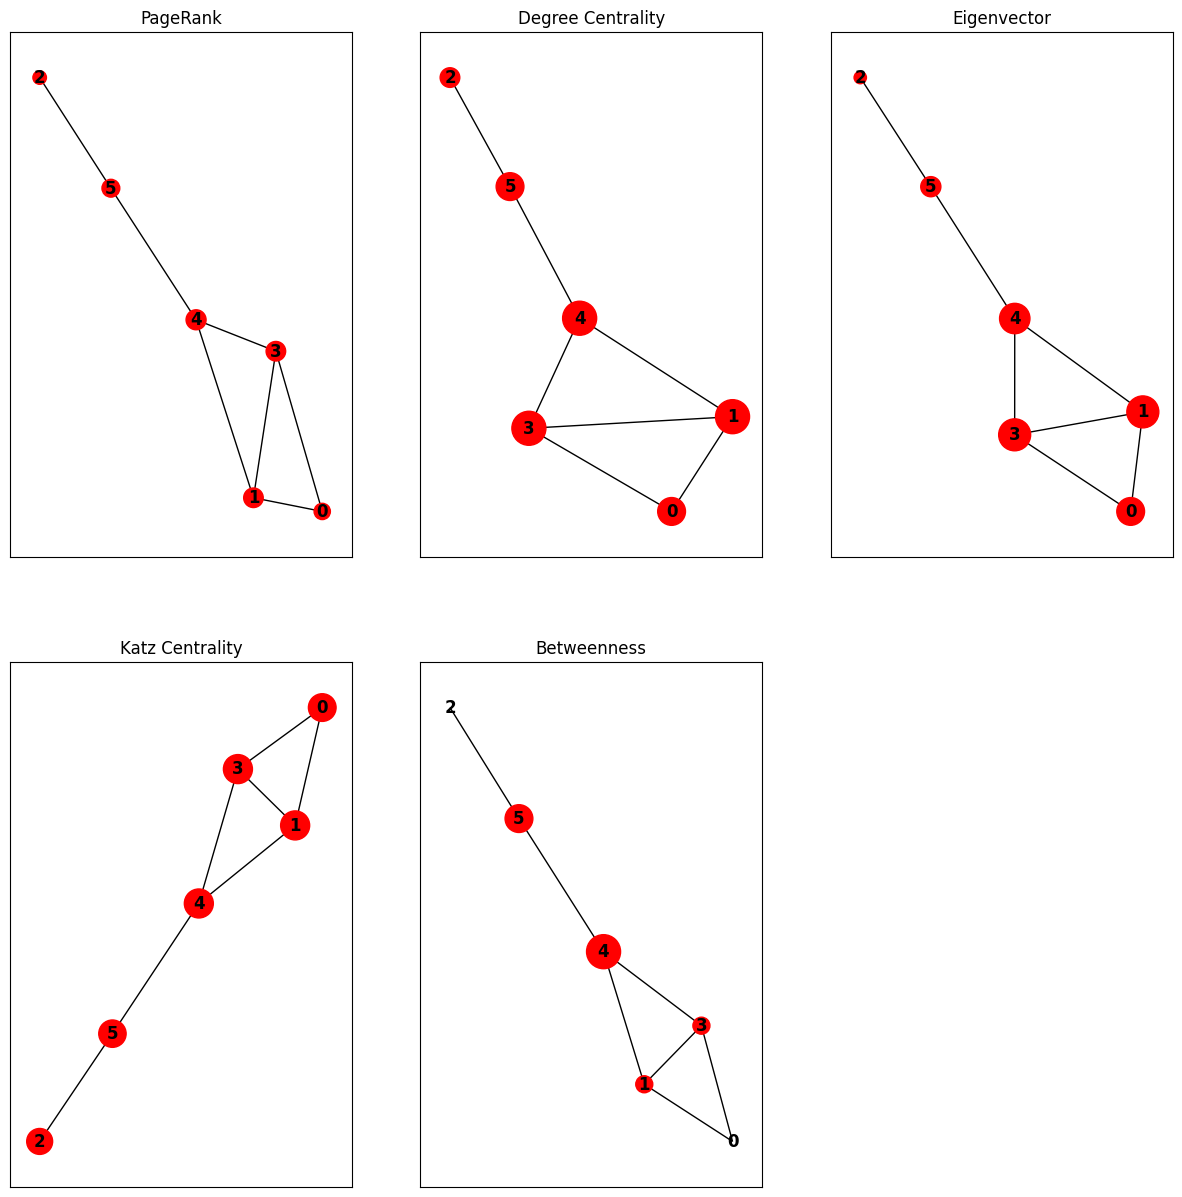

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

graph = nx.Graph()

nodes = [0, 1, 2, 3, 4, 5]
graph.add_nodes_from(nodes)

edges = []
for i in range(10):
    edge = tuple(random.sample(nodes, 2))
    edges.append(edge)
graph.add_edges_from(edges)

fig = plt.figure(figsize =(15, 15))

plt.subplot(231).set_title("PageRank")
pr = nx.pagerank(graph)
nx.draw_networkx(graph, node_size=[1000*v for v in pr.values()], node_color="red", with_labels=True, font_weight="bold")

plt.subplot(232).set_title("Degree Centrality")
de = nx.degree_centrality(graph)
nx.draw_networkx(graph, node_size=[1000*v for v in de.values()], node_color="red", with_labels=True, font_weight="bold")

plt.subplot(233).set_title("Eigenvector")
ei = nx.eigenvector_centrality(graph)
nx.draw_networkx(graph, node_size=[1000*v for v in ei.values()], node_color="red", with_labels=True, font_weight="bold")

plt.subplot(234).set_title("Katz Centrality")
ka = nx.katz_centrality(graph)
nx.draw_networkx(graph, node_size=[1000*v for v in ka.values()], node_color="red", with_labels=True, font_weight="bold")

plt.subplot(235).set_title("Betweenness")
be = nx.betweenness_centrality(graph)
nx.draw_networkx(graph, node_size=[1000*v for v in be.values()], node_color="red", with_labels=True, font_weight="bold")



## Berechnung der Zentralitäten

- Degree Centrality

Eine Node, die mit den mehreren anderen Nodes direkt verbunden ist, erhält höhere Zentralität.
"Degree" von einem Node ist die Zahl der Edges, die an dem Node angeschlossen sind. Bei einer gerichteten Graph werden "indegree" (Zahl der eingehenden Edges) und "outdegree" (Zahl der ausgehenden Edges) getrennt berechnet.
Durch Methode von "[nx.degree_centrality](https://networkx.org/documentation/stable/_modules/networkx/algorithms/centrality/degree_alg.html#degree_centrality)" wird die Degree-Zentralität einer Node folgendermassen berechnet:

$$ \frac{\text {Zahl der Edges von einer Node}}{\text {Zahl der Nodes - 1 }} $$

- Betweenness

Betweenness Centrality einer Node wird dadurch bemessen, in wie vielen Pfaden ("paths") zwischen die anderen Nodes die Node steht, also wie häufig die Node "dazwischen" steht.
In NetworkX gibt es eine Funktion [betweenness_centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality), mit der man Betweenness der Nodes in einer Graph berechnen kann.
Between Cntrality ($C_B$) von einer Node $v$ kann folgendermassen dargestellt werden:

$$
C_B(v) = \sum_{s,t \in V} \frac {\sigma(s,t|v)}{\sigma(s,t)}
$$

Dabei bedeutet $\sigma(s,t)$ die Gesamtzahl der kürzesten Paths zwischen den Node $s$ und $t$. $\sigma(s,t|v)$ stellt die Anzahl der Pfad, die darunter durch die Node $v$ durchläuft.

- Eigenvector

Bei der Eigenvector Zentralität werden die Zentralitäten der benachbarten Nodes auch für die Berechnung der Zentralität berücksichtigt. Für die Berechnung dieser Zentralität wird die [Adjazenzmatrix](https://de.wikipedia.org/wiki/Adjazenzmatrix) (adjacency matix) eingeführt.
Die Zentralität einer Node $v$ kann so dargestellt werden:

$$
C_v = \frac {1}{\lambda} \sum_{t \in G}A_{vt} C_t
$$

$A$ ist die Adjazenzmatrix der Graph $G$. $C_t$ ist die Eigenvector Zentralität der benachbarten Node $t$. $\lambda$ ist eine Konstante.

- Katz Centrality

Katz Zentralität kann als eine Variant von Eigenvector Zentralität betrachtet werden. Es werden zwei Parameter $\alpha$ und $\beta$ eingeführt. Die Zentralität wird so darzustellen:

$$
C_v = \alpha \sum_t {A_{vt}C_t} + \beta
$$

- PageRank

Diese Zentralität wurde bei Google Search eingesetzt, um die Rangfolge der Website festzulegen.Die Zentralität der Node $v$ ($C_v$), die $n$-fach benachbarte Node hat, wird demnach foldendermassen dargestellt:

$$
C_v = d \sum_{t=1}^{n} \frac {C_t}{k_t} + \frac {1 - d}{n}
$$

Hier $k_t$ bedeutet die Degree der Node $t$. $d$ ist laut [Brin und Page (1998)](https://snap.stanford.edu/class/cs224w-readings/Brin98Anatomy.pdf) die Dämpfungszahl, wobei $d$ ist eine Zahl zwischen 0 und 1. Brin und Page schreibt, dass sie in der Regel die Zahl 0.85 für $d$ verwendet.

Es sind noch mehr "Zentralitäten", die man mit NetworkX einfach berechnen kann. In der Dokumentation der Library findet man die [Übersicht](https://networkx.org/documentation/stable/reference/algorithms/centrality.html).

## Quiz

NetworkX bietet Graph-Beispiele an. Man kann z.B. das Netzwerk der Charaktere im Roman "Les Miserables" ganz einfach darstellen, wie unten.

Die Beschreibung der Daten und Funktion ist [hier]((https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.les_miserables_graph.html) zu finden.

Könnt ihr das Netzwerk mit unterschiedlichen Zentralität darstellen?


In [ ]:
import networkx as nx

graph = nx.les_miserables_graph()
# Man kann mit "font_size" und/oder "font_color" die Darstellung der Labels steuern
nx.draw(graph, node_size=100, with_labels=False)

## Wie gehen wir weiter vor?

Man kann eine Graph noch weiter analysieren, vor allem mit mathematisch-statistischen Methoden. Aber in disesem Workshop beschäftigen wir uns eher damit, Graphen in unterschiedlichen Einsatzszenarien zu erstellen. D.h., wir lernen die Daten sammeln und für Graph-Darstellung zubereiten.  